In [69]:
%config InlineBackend.figure_format = 'retina'

from scipy.stats import binom
import matplotlib.pyplot as plt
import math
import numpy as np

Experiment is for the following, this is in response to Yulong's assumptions on network security based on a sharding based sampling assumption.


We work with the following assumptions:

1) There is a sharding committee size $C$

2) There are S shards on the network, each shard $S$ has as it's committee size $C$. Therefore the total number of "users" in all shards is $S*C$

3) The same user _is_ allowed to participate in multiple shards. There are no rules regarding uniqueness.

Recall that we want network security, want to model the following question:

Given that there are $S$ shards, with $C$ committee members per shard, and given that users can be in multiple shards. Additionally, define a parameter $\beta := H/N$ where $H$ is the number of honest nodes and $N$ is the number of _total_ nodes in the network. What is the probability that there are _no_ faulty shards in the network.

We can model the individual shard as a binomial distribution $P(k;n,p)$, the probability of $k$ successes given $n$ trials with probability $p$. Assuming that everyone votes, this should be:

\begin{equation}
Pr(k > \beta C) = P(k>\beta C;N,\beta)
= \sum\limits_{k > \beta C}^N P(k;N,\beta)
\end{equation}

Given that we know the probability of success in each shard (as they are the same). We can then measure the probability of success in all shards through a joint distribution:

\begin{equation}
Pr(S) = \prod\limits_{s \in S} Pr_s(k > \beta C)
= \prod\limits_{s \in S} Pr(k > \beta C)
\end{equation}


Since all probabilities are assumed to be the same for each shard

security of network: 0.999999999173184


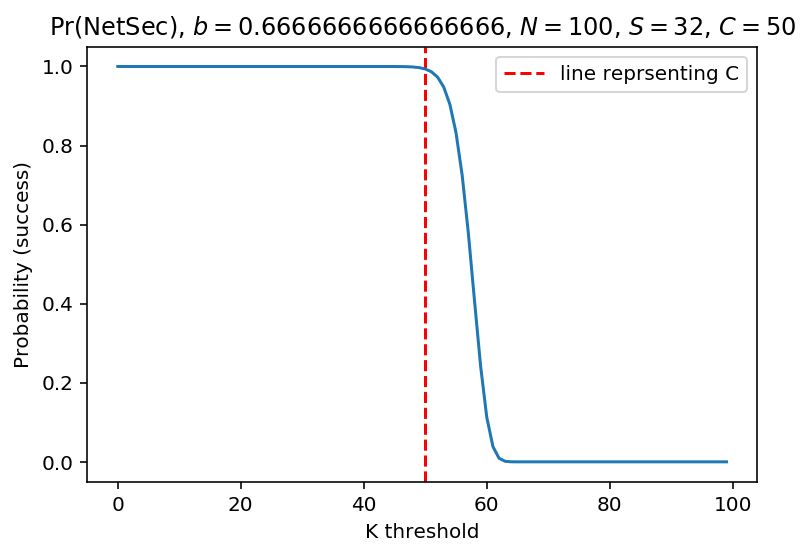

In [85]:
# assume these
N = 100
S = 32
C = 50
beta = 2/3
K_thresh = math.ceil(beta*C)
binom.pmf(K_thresh, N, beta)

# probability of getting more than the required threshold (success)
x = np.arange(K_thresh+1, N, 1)
s_suc = sum(binom.pmf(x, N, beta))
s_glob = s_suc ** S
print("security of network:", s_glob)

# graph depicting security of network as K_thresh increases
success_sum = []
for i in range(0, N):
    x_i = np.arange(i, N, 1)
    s_suc_sum = sum(binom.pmf(x_i, N, beta))
    s_glob_sum = s_suc_sum ** S
    success_sum.append(s_glob_sum)
    
plt.title(f"Pr(NetSec), $b={beta}$, $N={N}$, $S={S}$, $C={C}$")
plt.ylabel("Probability (success)")
plt.xlabel("K threshold")
plt.axvline(x=C, linestyle='--', color='r', label='line reprsenting C')
plt.legend()
plt.plot(success_sum)